In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.1)
datagen2 = ImageDataGenerator(rescale=1. / 255)
img_height = 224
img_width = 224 
batch_size = 80
test_batch = 1520
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/dataset Rafi/RESIZED_DATASET',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/dataset Rafi/RESIZED_DATASET',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')
test_it = datagen2.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/dataset Rafi/RESIZED_TESTING_DATA',target_size=(img_height, img_width), batch_size = batch_size)

Found 9972 images belonging to 38 classes.
Found 1089 images belonging to 38 classes.
Found 1520 images belonging to 38 classes.


In [ ]:
test_batch = 1520
test_it = datagen2.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/dataset Rafi/RESIZED_TESTING_DATA',target_size=(img_height, img_width), batch_size = test_batch)

Found 1520 images belonging to 38 classes.


In [ ]:
from tensorflow.keras.applications import inception_v3
# Init the VGG model
vgg_conv = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 38)                1945638   
Total params: 23,748,422
Trainable params: 1,945,638
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
import keras
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.16,
    staircase=True)
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
              metrics=['acc'])

In [ ]:
nb_epochs = 35
batch_size = 80
history = model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
124/124 [==============================] - 2657s 21s/step - loss: 3.0097 - acc: 0.2296 - val_loss: 2.2143 - val_acc: 0.3894
Epoch 2/35
124/124 [==============================] - 32s 258ms/step - loss: 1.2927 - acc: 0.6330 - val_loss: 1.8534 - val_acc: 0.4837
Epoch 3/35
124/124 [==============================] - 32s 258ms/step - loss: 0.9405 - acc: 0.7423 - val_loss: 1.6727 - val_acc: 0.5183
Epoch 4/35
124/124 [==============================] - 32s 259ms/step - loss: 0.7535 - acc: 0.8003 - val_loss: 1.6103 - val_acc: 0.5567
Epoch 5/35
124/124 [==============================] - 32s 257ms/step - loss: 0.6254 - acc: 0.8404 - val_loss: 1.4966 - val_acc: 0.5702
Epoch 6/35
124/124 [==============================] - 32s 258ms/step - loss: 0.5398 - acc: 0.8697 - val_loss: 1.4982 - val_acc: 0.5750
Epoch 7/35
124/124 [==============================] - 32s 257ms/step - loss: 0.4667 - acc: 0.8916 - val_loss: 1.4617 - val_acc: 0.5798
Epoch 8/35
124/124 [==============================] - 3

In [ ]:
test_score = model.evaluate_generator(test_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 76.84%
[INFO] Loss:  0.7329228520393372


In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

Text(0.5, 1.0, 'Loss Curves')

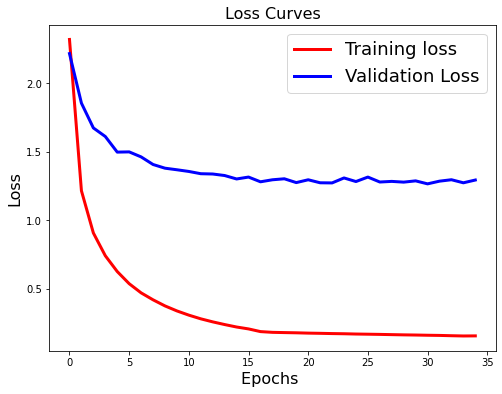

In [ ]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['loss'],'r',linewidth=3.0)

plt.plot(history.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

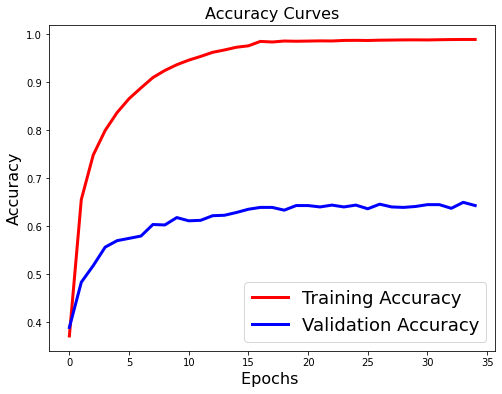

In [ ]:
# Accuracy Curves

plt.figure(figsize=[8,6])

plt.plot(history.history['acc'],'r',linewidth=3.0)

plt.plot(history.history['val_acc'],'b',linewidth=3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '4', '5', '6', '7', '8', '9']


In [ ]:
y_class_batch.shape

(80, 38)

In [ ]:
y_img_batch, y_class_batch = test_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

14.6


In [ ]:
cm = confusion_matrix(y_true,y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Normalized confusion matrix


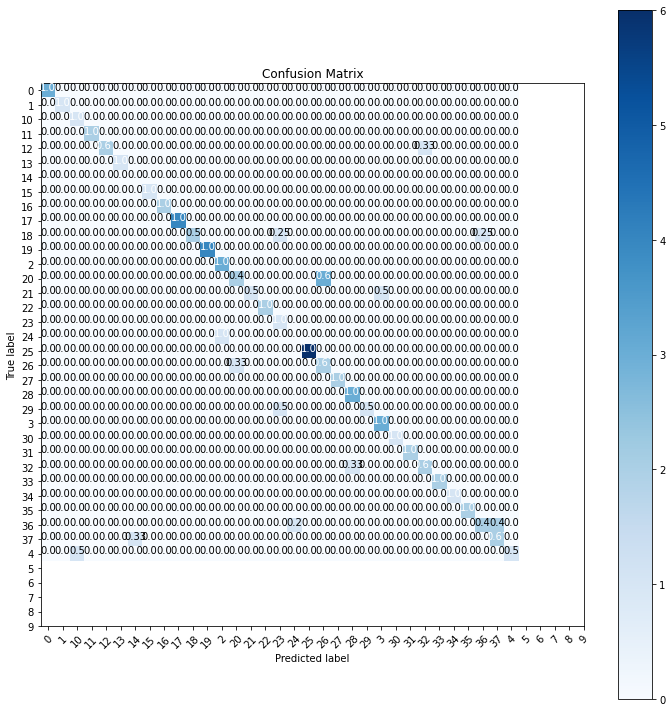

In [ ]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        40
           1       0.80      0.82      0.81        40
           2       0.79      0.82      0.80        40
           3       0.85      0.85      0.85        40
           4       0.87      0.68      0.76        40
           5       0.72      0.70      0.71        40
           6       0.67      0.65      0.66        40
           7       0.61      0.62      0.62        40
           8       0.92      0.82      0.87        40
           9       0.88      0.88      0.88        40
          10       0.61      0.55      0.58        40
          11       0.74      0.78      0.76        40
          12       0.85      0.70      0.77        40
          13       0.88      0.88      0.88        40
          14       0.71      0.90      0.79        40
          15       0.53      0.60      0.56        40
          16       0.68      0.53      0.59        40
     

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_Rafi_inception")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1/Dataset_Rafi_inception/assets
